# ECE 175A
## By: Jay Paek

In [1]:
from scipy.io import loadmat as load
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
# import cupy as np

Prepare datasets.

In [2]:
data = load('data.mat')
labels = load('label.mat')
train_data = data['imageTrain'].astype('int').reshape((784,5000)).T
train_labels = labels['labelTrain'].reshape((5000,))
test_data = data['imageTest'].astype('int').reshape((784,500)).T
test_labels = labels['labelTest'].reshape((500,))

## Problem 1
determine the sample means for each class.

In [3]:
means = np.zeros((10,784))
for i in range(10):
    means[i] = np.mean(train_data[train_labels == i], axis = 0)

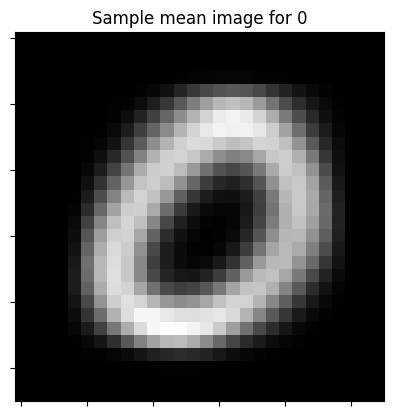

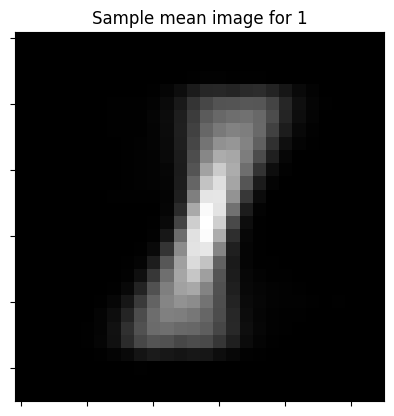

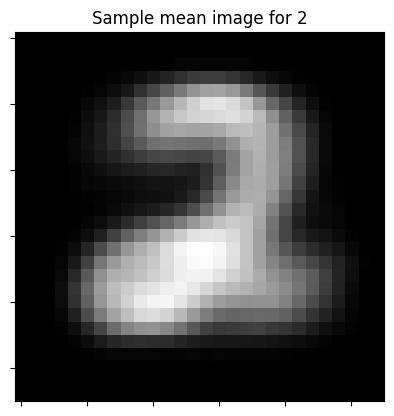

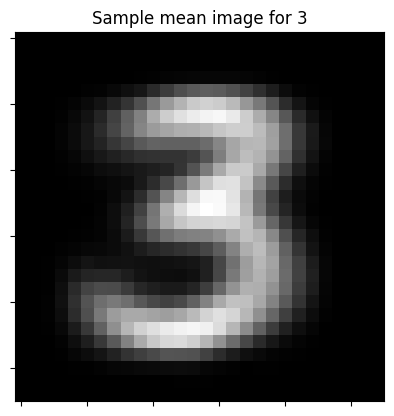

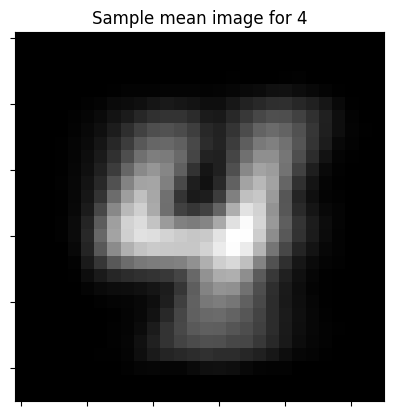

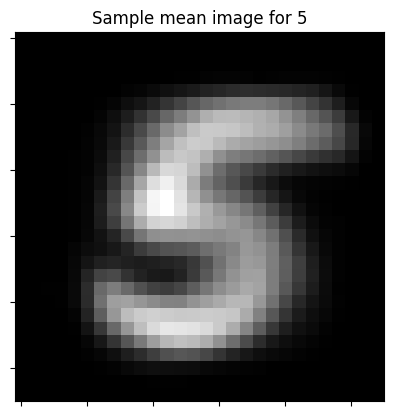

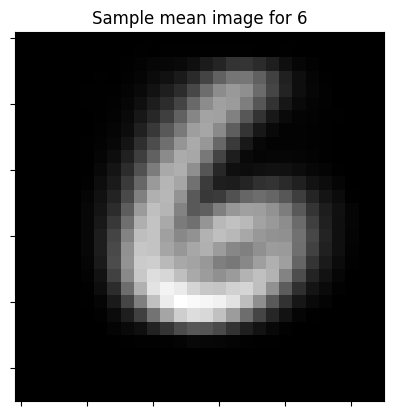

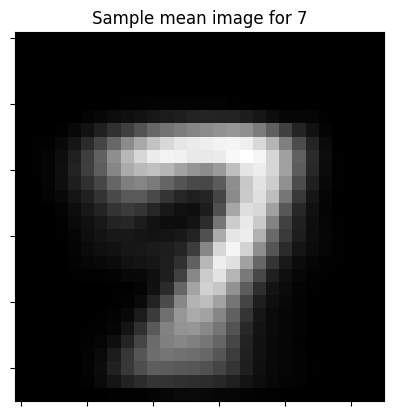

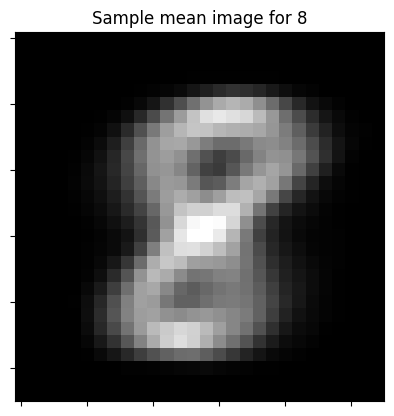

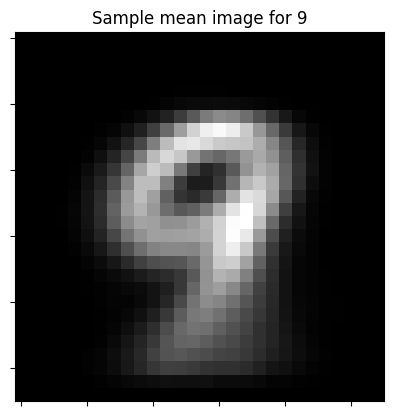

In [4]:
for i in range(10):
    ax, arr = plt.subplots(1,1)
    arr.imshow(means[i].reshape((28,28)), cmap='gray')
    arr.set_yticklabels([])
    arr.set_xticklabels([])
    arr.set_title(f'Sample mean image for {i}')

## Problem 2
use the Bayesian Decision Rule to make predictions.

Additionally, the determinant of the identity is always 1 and the inverse of the identity matrix is the identity matrix. 

We can actually simplify the equation for the Bayesian decision rule. Initially:
$$ arg\underset{i}max  \{ -\frac{1}{2} (x- \mu_i)^T \Sigma_{i}^{-1}(x-\mu_i)  - \frac{1}{2}log(2\pi)^d|\Sigma_i| + log(P_Y(i))\}$$
but $\frac{1}{2}log(2\pi)^d|\Sigma_i|$ and $log(P_Y(i))$ are the same across each image and each class due to the assumptions.
$$arg\underset{i}max  \{ -\frac{1}{2} (x- \mu_i)^T \Sigma_{i}^{-1}(x-\mu_i)\}$$
Recall that the weighted norm with the identity matrix is just the norm.
$$arg\underset{i}max  \{ -\frac{1}{2} (x- \mu_i)^T(x-\mu_i)\}$$


In [5]:
predictions = []
for image in test_data:
    predictions.append(np.argmax(-np.linalg.norm(image - means, axis=1)/2 ))

In [6]:
expected = []
predicted = [0] * 10
for i in range(10):
    expected.append(np.count_nonzero(test_labels == i))
for i in range(len(test_labels)):
    answer = test_labels[i]
    if answer == predictions[i]:
        predicted[answer] += 1

Text(0.5, 0, 'Class')

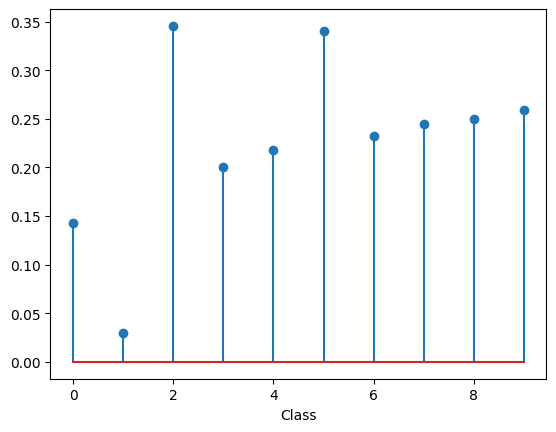

In [7]:
plt.stem([1-predicted[i]/expected[i] for i in range(10)])
plt.xlabel('Class')

In [13]:
predicted

[36, 65, 36, 36, 43, 33, 33, 37, 30, 40]

In [8]:
print(f'Total Error Rate: {1-sum(predicted)/sum(expected)}')

Total Error Rate: 0.22199999999999998


In [9]:
sum(predicted)

389

## Problem 3

In [10]:
covariances = np.zeros((10,784,784))
for i in range(10):
    covariances[i,:,:] = np.cov(train_data[train_labels == i], rowvar=False)

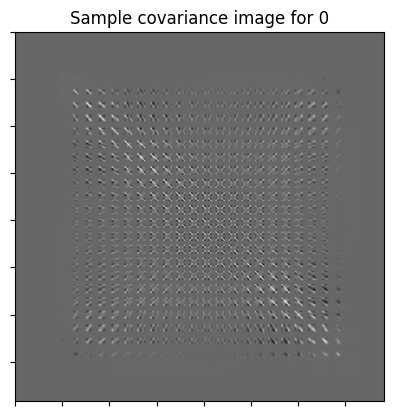

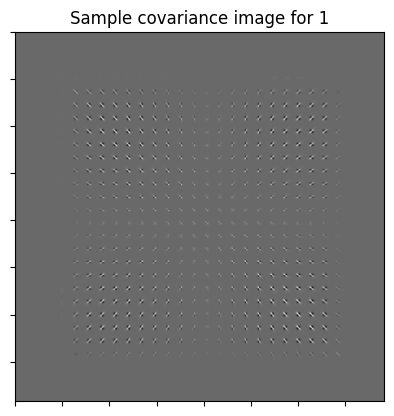

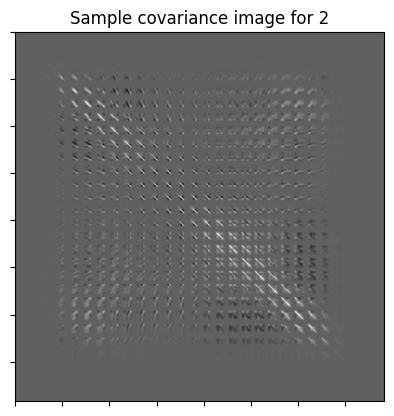

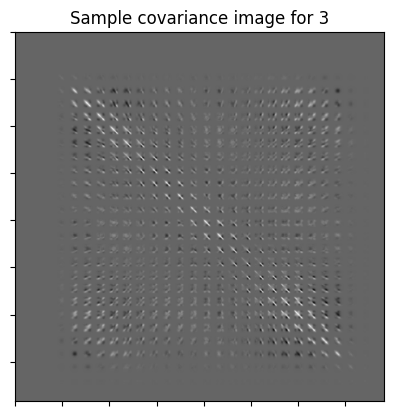

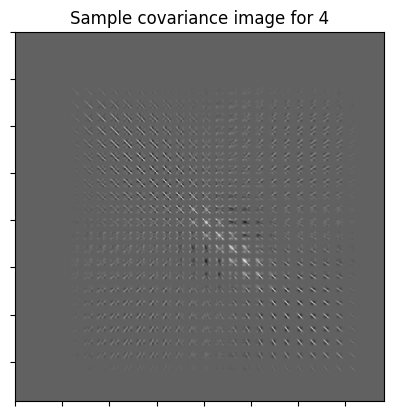

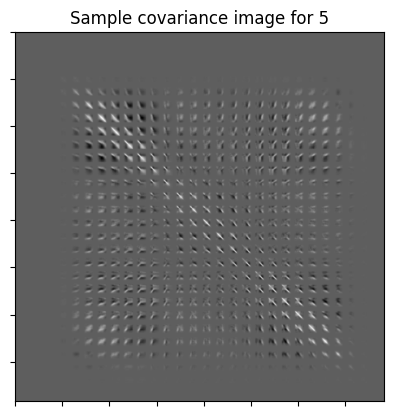

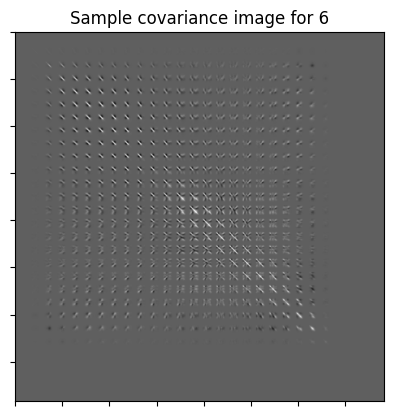

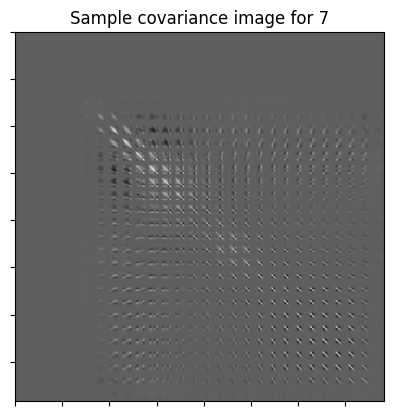

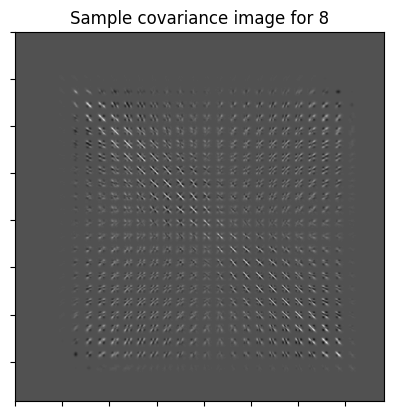

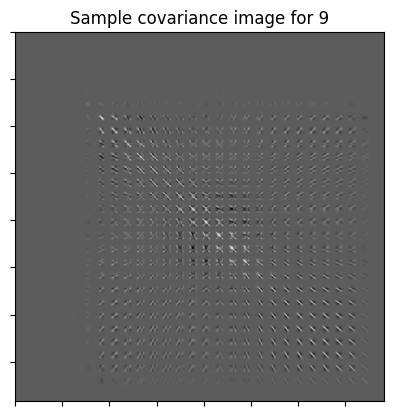

In [11]:
for i in range(10):
    ax, arr = plt.subplots(1,1)
    arr.imshow(covariances[i, :, :], cmap='gray')
    arr.set_yticklabels([])
    arr.set_xticklabels([])
    arr.set_title(f'Sample covariance image for {i}')

What's that massive grey border?

In [12]:
for i in range(10):
    inverse = np.linalg.inv(covariances[i,:,:])

LinAlgError: Singular matrix

Clearly, the outer border is entirely 0's, which makes the matrix non-invertible. We want to use the inverse of the covariance matrix to normalize our data, but we can not find such matrix. Hence, we can not use the covariance matrix within our calculations.